In [4]:
#Import everything
import Main.test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Helpers.regression_helpers import *

# Baseline Visualization

In [5]:
pipeline_baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/ManifoldData/PipelineBasline.csv", index_col=0).rename(columns = {"Method": "method"})
pipeline_baselines[pipeline_baselines["csv_file"] == "AutoMPG.csv"]

,csv_file,method,split,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),CE (4 KNN)
40,AutoMPG.csv,Domain A Pipeline Baseline,random,0.853003,0.891389,0.867925,0.400147,0.362866,0.837942
41,AutoMPG.csv,Domain B Pipeline Baseline,random,0.717576,0.705817,0.758699,0.540866,0.597198,0.589965
42,AutoMPG.csv,Domain A Pipeline Baseline,even,0.856505,0.876371,0.842714,0.436671,0.387142,0.838667
43,AutoMPG.csv,Domain B Pipeline Baseline,even,0.715317,0.824578,0.772369,0.525322,0.461160,0.664236
44,AutoMPG.csv,Domain A Pipeline Baseline,turn,0.855654,0.894404,0.850249,0.426083,0.357794,0.817890
45,AutoMPG.csv,Domain B Pipeline Baseline,turn,0.860148,0.838246,0.850249,0.426083,0.442830,0.817890
46,AutoMPG.csv,Domain A Pipeline Baseline,skewed,0.603672,0.526916,0.638252,0.662237,0.757319,0.569903
47,AutoMPG.csv,Domain B Pipeline Baseline,skewed,0.853153,0.912196,0.861153,0.410278,0.326263,0.835345
48,AutoMPG.csv,Domain A Pipeline Baseline,distort,0.855654,0.894404,0.850249,0.426083,0.357794,0.817890
49,AutoMPG.csv,Domain B Pipeline Baseline,distort,0.841350,0.861267,0.844655,0.433968,0.410109,0.795782


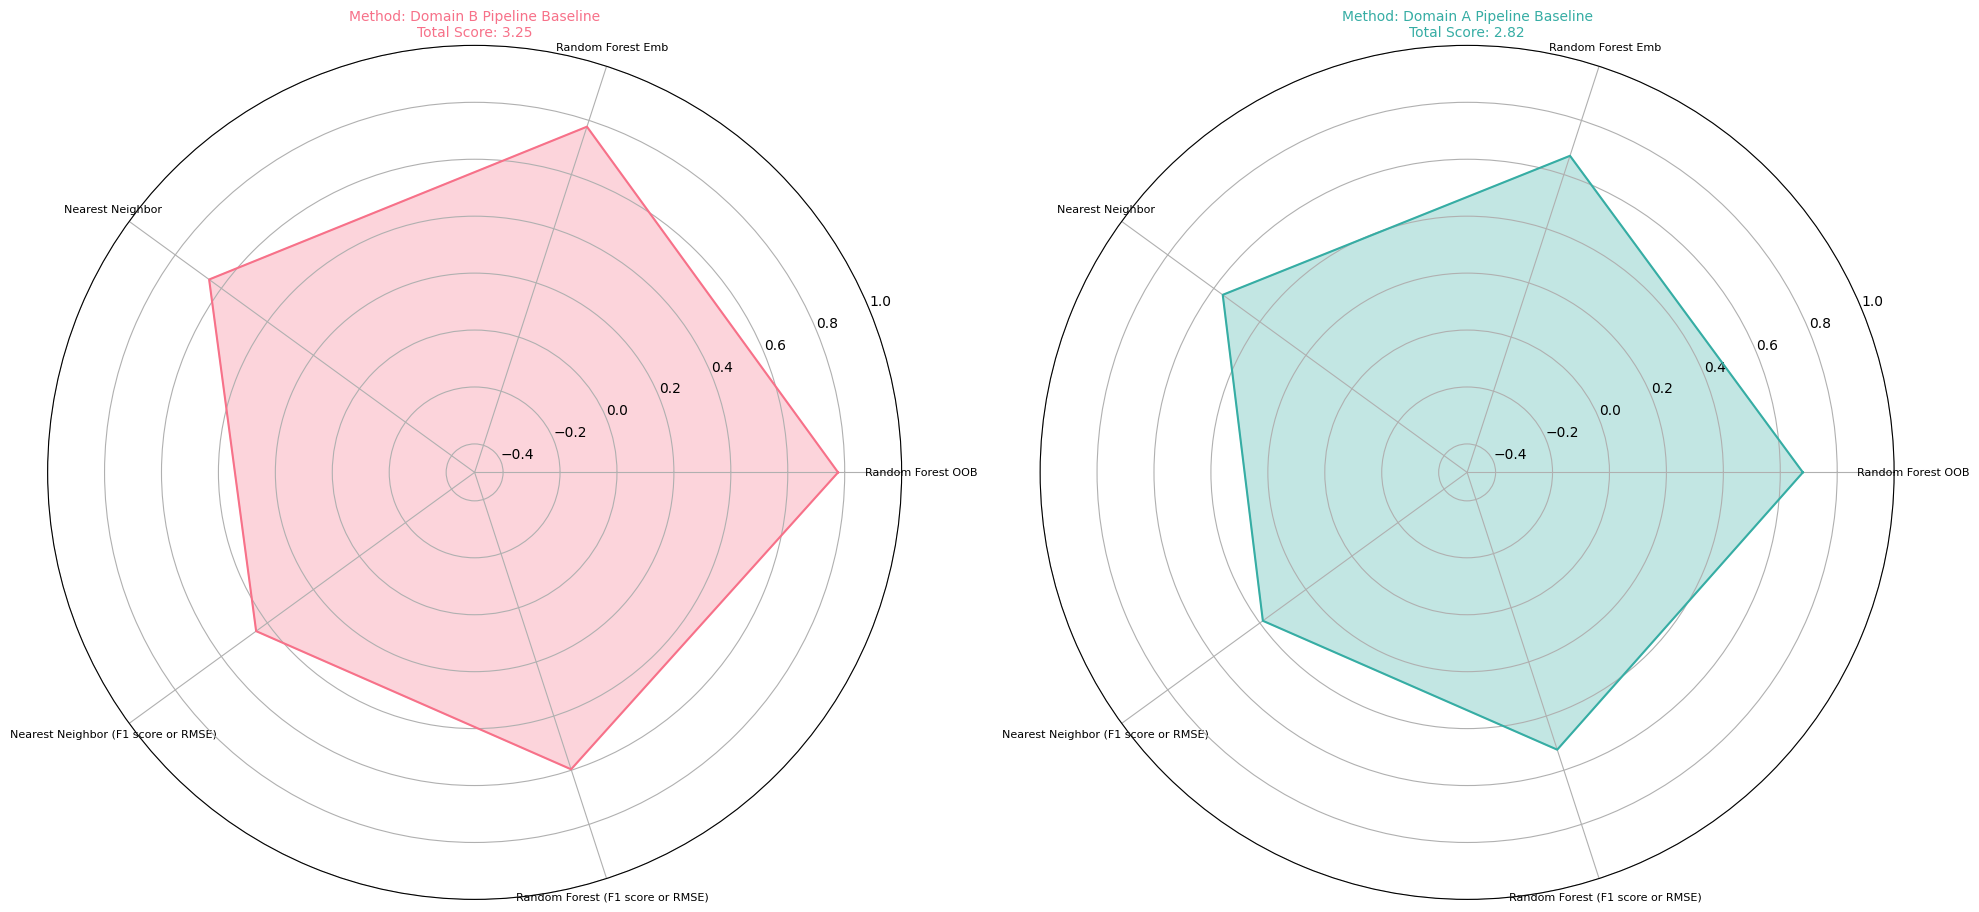

In [6]:
plot_radial(pipeline_baselines, ['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

In [7]:
baselines_cross = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineData.csv")
baselines_in_sample = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataOnSample.csv")
baselines = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData/BaselineDataTrainTest.csv", index_col=0).rename(columns = {"KNN_BL_A": "A_Classification_Score", "KNN_BL_B": "B_Classification_Score"})
baselines.sample(5)

,csv_file,split,KNN,A_Classification_Score,B_Classification_Score
251,OpticalNetwork,turn,15,0.708064,0.708064
152,CommunityCrime,turn,82,0.592101,0.592101
211,SML2010,distort,85,0.863929,0.852870
632,ConcreteCompressiveStrength,turn,44,0.610397,0.610926
156,CommunityCrime,turn,242,0.510733,0.510735


In [8]:
# Group by csv_file and select the row with the 3rd smallest knn value
third_smallest_knn = baselines.groupby(by = ["csv_file", "split"]).apply(lambda x: x.nsmallest(3, 'KNN').iloc[-1]).reset_index(drop=True)

# Ensure the resulting DataFrame has the same format as baselines_grouped
third_smallest_knn_grouped = third_smallest_knn.groupby(by=["csv_file", "split"]).agg({
    "A_Classification_Score": "max",
    "B_Classification_Score": "max"
}).reset_index()

third_smallest_knn_grouped

,csv_file,split,A_Classification_Score,B_Classification_Score
0,AirfoilSelfNoise,distort,0.618199,0.569388
1,AirfoilSelfNoise,even,0.276153,0.236131
2,AirfoilSelfNoise,random,0.102140,0.120893
3,AirfoilSelfNoise,skewed,0.130755,0.306649
4,AirfoilSelfNoise,turn,0.618199,0.618291
...,...,...,...,...
65,SML2010,distort,0.805852,0.794499
66,SML2010,even,0.894993,0.724169
67,SML2010,random,0.673677,0.159716
68,SML2010,skewed,0.687260,0.826502


In [9]:
baselines_grouped = baselines.groupby(by = ["csv_file", "split"]).max().drop(columns = ["KNN"]).reset_index()
try:
    baselines_grouped.drop(columns = ["Unnamed: 0"], inplace= True)
except:
    print("Didn't need to run")

baselines_grouped[baselines_grouped["csv_file"] == "Hydrodynamics"]

Didn't need to run


,csv_file,split,A_Classification_Score,B_Classification_Score
45,Hydrodynamics,distort,0.731098,0.583344
46,Hydrodynamics,even,-0.132785,0.971827
47,Hydrodynamics,random,0.904653,-0.135059
48,Hydrodynamics,skewed,-0.134976,0.916070
49,Hydrodynamics,turn,0.731098,0.730979


<Axes: xlabel='csv_file'>

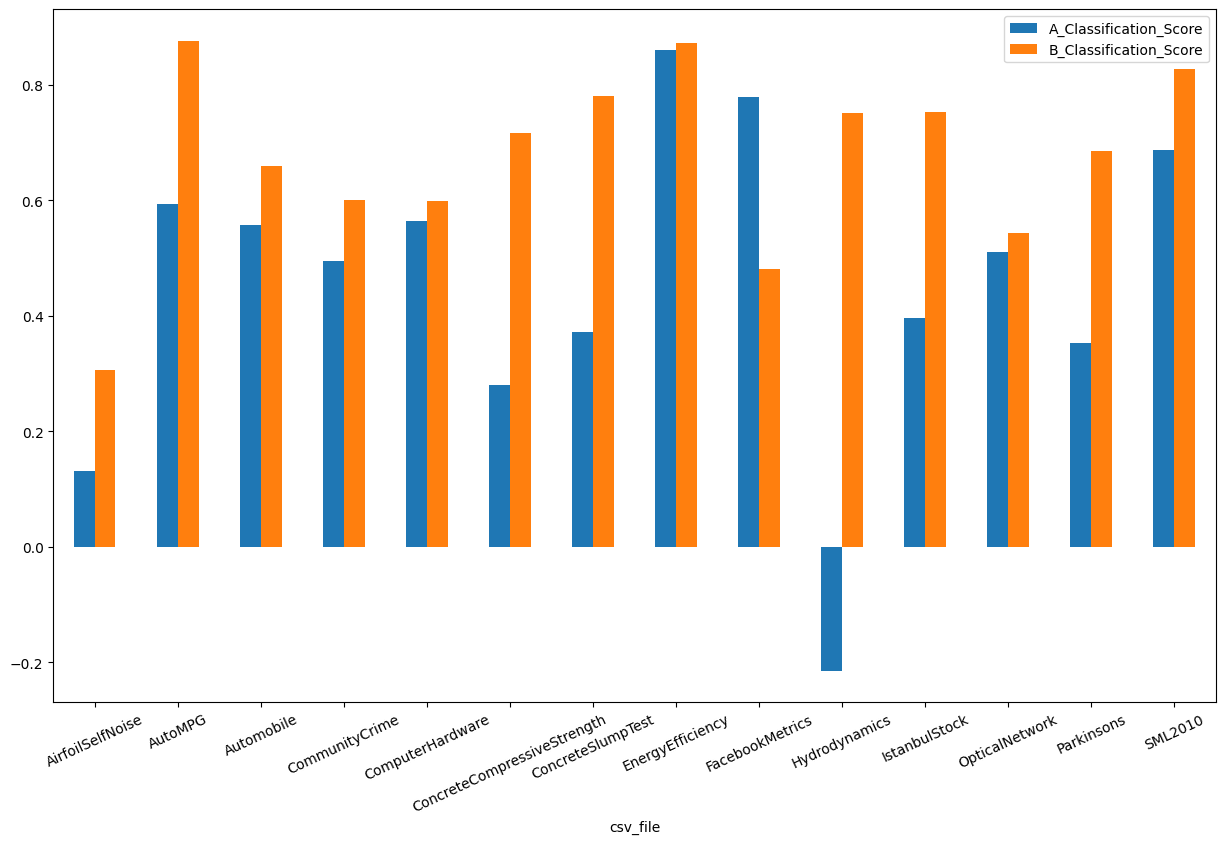

In [10]:
third_smallest_knn_grouped[third_smallest_knn_grouped["split"] == "skewed"].set_index("csv_file").plot(kind = "bar", subplots=False, figsize=(15,9), rot= 25)

# Model Comparison

In [11]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")
print(f"File Length: {len(reg_df)}")
reg_df.sample(5)


File Length: 1273


,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
488,SPUD,OpticalNetwork,distort,0.3,"{'knn': 15, 'OD_method': 'default', 'agg_metho...","{'42': 0.5107811465447953, '1738': 0.273181488...","{'42': 0.043339632149155954, '1738': 0.0443209...","{'42': 0.7763817233725775, '1738': 0.780663170...","{'42': 0.7605304081754527, '1738': 0.814340277...","{'42': 0.5260462440843758, '1738': 0.563628271...","{'42': 0.6953703933660575, '1738': 0.658144350...","{'42': 0.4942804099795886, '1738': 0.429290920...","{'42': {'RF-OOB': 0.7715965004413333, 'KNN': 0...","{'knn': 0.1834119472267876, 'OD_method': 0.031..."
458,MALI,OpticalNetwork,even,0.3,"{'knn': 2, 'mu': 0.3, 't': 3, 'transition_only...",{'42': -0.049381895977259394},{'42': 0.3803905265810028},{'42': 0.007946244919818435},{'42': 0.03849635690051434},{'42': 0.09694212327497675},{'42': 0.9598558227083268},{'42': 0.9904297530311215},"{'42': {'RF-OOB': 0.23159238283830652, 'KNN': ...",{}
1089,SPUD,ConcreteCompressiveStrength,skewed,0.3,"{'knn': 170, 'OD_method': 'default', 'agg_meth...",{'42': -0.04404739843552763},{'42': 0.002555377509661608},{'42': 0.437828292286929},{'42': 0.46551802011587373},{'42': 0.31107435727812227},{'42': 0.7975504140261005},{'42': 0.7024873426033984},"{'42': {'RF-OOB': 0.37214300694409375, 'KNN': ...","{'knn': 0.33736230737714334, 'OD_method': 0.44..."
930,SSMA,Parkinsons,random,0.3,"{'knn': 710, 'Uincluded': False, 'Dincluded': ...","{'42': 0.14507401932024955, '1738': -0.0453603...","{'42': 0.44823869321613974, '1738': 0.46573879...","{'42': 0.01494371525679905, '1738': -0.2193065...","{'42': 0.07167028570168654, '1738': -0.1475434...","{'42': 0.3171377422845496, '1738': 0.146586285...","{'42': 0.8364618654660962, '1738': 0.950151540...","{'42': 0.975283141544793, '1738': 1.1017869632...","{'42': {'RF-OOB': 0.061771496531849324, 'KNN':...",{}
565,RF-NAMA,AutoMPG,distort,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': -0.026185469651093474, '1738': -0.08901...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.04931649958435547, '1738': 0.08899838...","{'42': -0.04575430994240426, '1738': -0.343468...","{'42': 0.0822528037249094, '1738': -0.18073116...","{'42': 0.8768918293170914, '1738': 0.977486093...","{'42': 0.9360505909860892, '1738': 1.042674670...","{'42': {'RF-OOB': 0.027493853901354615, 'KNN':...",{}


In [12]:
proc_reg_df = reg_df.drop(columns = ["Best_Params", "Parameter STD"])

#Average out the random seeds
for columns in ["CE", "FOSCTTM", "Random Forest OOB", "Random Forest Emb", "Nearest Neighbor", "Nearest Neighbor (F1 score or RMSE)", "Random Forest (F1 score or RMSE)"]:
    proc_reg_df[columns] = [np.mean(list(d.values())) for d in proc_reg_df[columns].values]

proc_reg_df["Combined_Metric"] = proc_reg_df["CE"] - proc_reg_df["FOSCTTM"]
proc_reg_df = proc_reg_df.merge(third_smallest_knn_grouped, how = "left")

In [13]:
proc_reg_df.sample(3)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
71,RF-SPUD,ComputerHardware,random,0.3,0.083116,0.000971,0.507395,0.389238,0.176017,0.927701,0.814979,"{'42': {'RF-OOB': 0.6808779908210894, 'KNN': 0...",0.082146,0.656128,0.433617
330,MALI,CommunityCrime,even,0.3,-0.268877,0.048422,-0.018124,-0.075810,-0.023821,0.950458,0.974291,"{'42': {'RF-OOB': -0.006288718706286112, 'KNN'...",-0.317299,0.563549,0.579571
1196,MAGAN,AirfoilSelfNoise,distort,0.3,-0.645378,0.000000,0.354510,0.354238,0.133933,0.917159,0.791161,"{'42': {'RF-OOB': 0.3121147851511611, 'KNN': 0...",-0.645378,0.618199,0.569388


In [14]:
#This helps me to see where my tests have failed
results_df = plt_methods_by_CSV_max(df = proc_reg_df, metric = "Combined_Metric", return_df=True)#.head(13) #, split = "skewed"
results_df

,csv_file,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF,BL_A,BL_B
0,ConcreteCompressiveStrength,0.579742,-0.171202,0.900178,0.355952,0.640715,0.769619,0.773025,-0.159360,-0.122166,0.900479,0.845669,0.628309,-0.355010,-0.128310,-0.074225,0.610397,0.715961
1,Hydrodynamics,0.664402,0.532023,0.899806,0.799632,0.671012,0.706608,0.878167,-0.054671,-0.077427,0.895496,0.796840,0.720924,-0.211597,0.759538,0.932535,0.585006,0.790342
2,FacebookMetrics,0.592234,-0.007211,0.759274,0.262851,0.684521,0.685547,0.592401,0.320081,-0.121600,0.744296,0.660645,0.690289,-0.114347,0.503568,0.543361,0.778232,0.691495
3,CommunityCrime,0.497916,-0.024250,0.793918,0.535569,0.710046,0.712440,0.583943,-0.142984,-0.192051,0.786104,0.740419,0.642806,-0.290245,-0.139376,0.252467,0.592101,0.599702
4,OpticalNetwork,0.473332,-0.147061,0.908100,0.518772,0.747207,0.676237,0.924531,-0.180715,-0.182083,0.910902,0.854887,0.774292,-0.350329,0.451797,0.022364,0.615307,0.798834
5,Automobile,0.757670,0.256283,0.882649,0.715318,0.767879,0.821432,0.841581,0.343892,0.098240,0.881048,0.804208,0.723531,-0.139808,0.795496,0.769123,0.624074,0.717398
6,ConcreteSlumpTest,0.513335,0.395941,0.890893,0.623485,0.780732,0.751162,0.570243,0.123935,0.102971,0.816872,0.875523,0.318204,-0.171756,0.852770,0.793678,0.745238,0.779765
7,ComputerHardware,0.962834,0.096644,0.964519,0.686117,0.799729,0.864906,0.581483,0.045628,0.069540,0.949490,0.845673,0.809029,-0.189637,0.927786,0.641705,0.656128,0.626540
8,IstanbulStock,0.674731,0.292751,0.844776,0.441662,0.805451,0.811195,0.714202,0.195857,-0.124704,0.834900,0.730128,0.642801,-0.316266,0.366207,0.766318,0.714484,0.771851
9,AirfoilSelfNoise,0.488030,-0.113552,0.962474,0.531724,0.873111,0.859316,0.797466,-0.135461,-0.169613,0.924405,0.848466,0.690631,-0.270939,-0.182528,-0.057775,0.618199,0.618291


<Axes: >

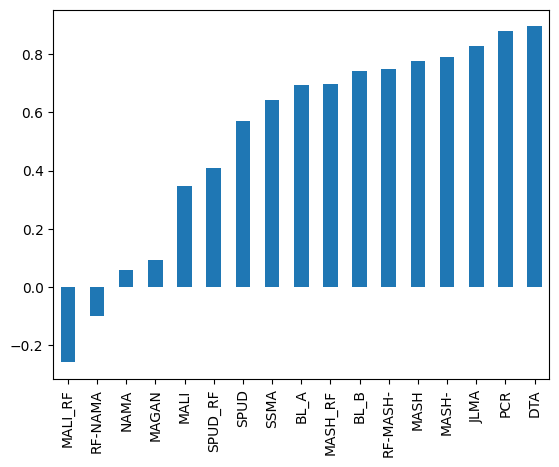

In [15]:
# Visualization
results_df.drop(columns=["csv_file"]).mean(axis = 0).sort_values().plot(kind="bar")

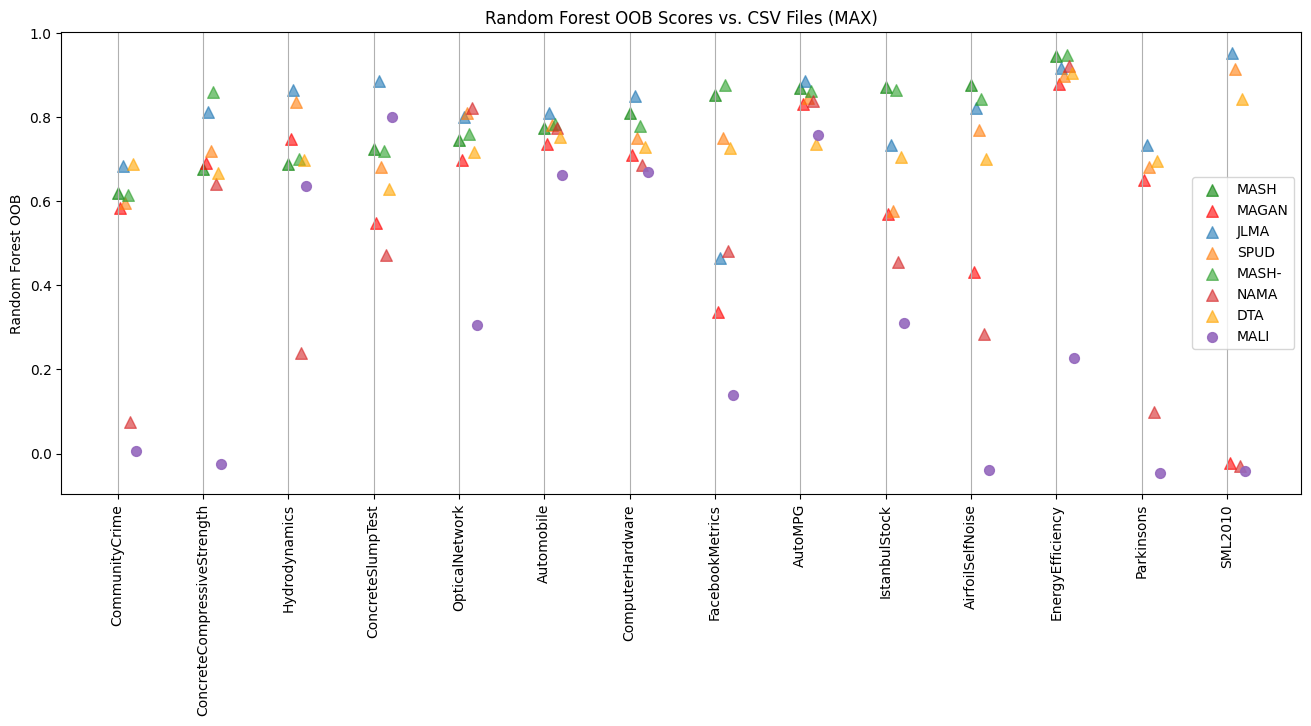

In [16]:
plt_methods_by_CSV_max(df = proc_reg_df, metric = "Random Forest OOB",
                    plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

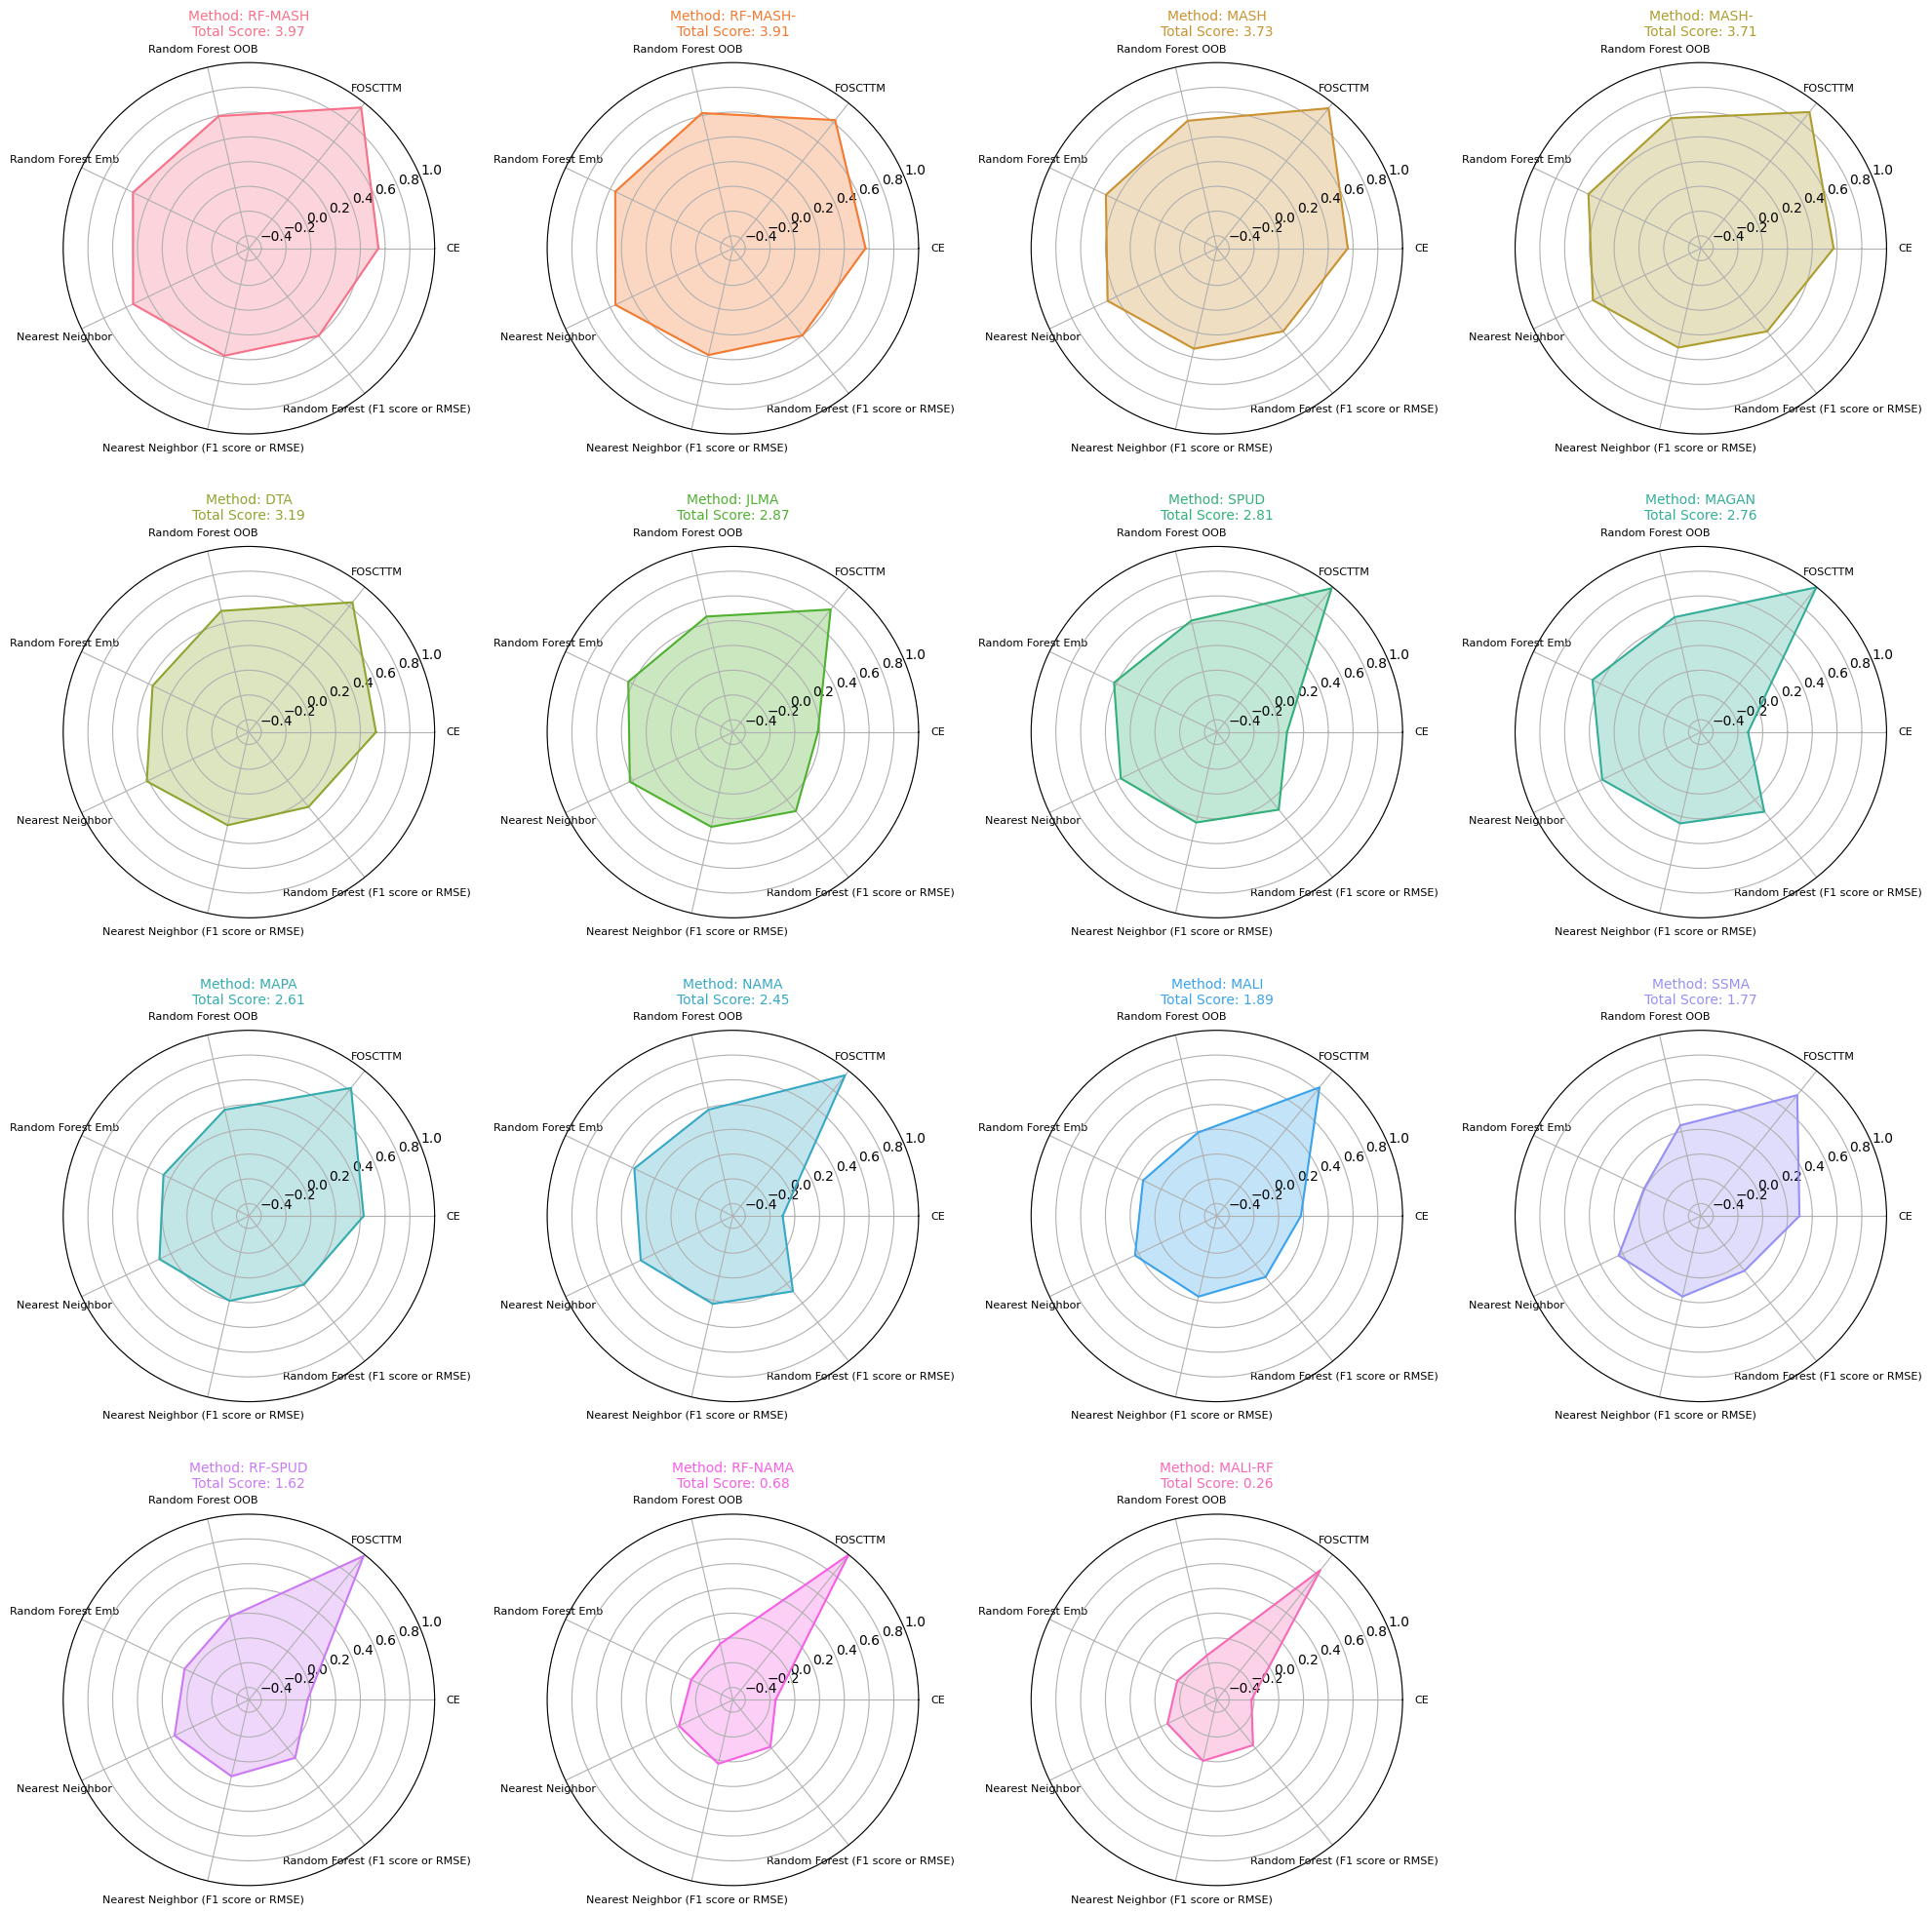

In [17]:
plot_radial(proc_reg_df, ['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)'])

## Veiw GRAE

In [18]:
proc_reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Combined_Metric,A_Classification_Score,B_Classification_Score
185,MALI-RF,Hydrodynamics,turn,0.3,-0.148484,0.115875,-0.155928,-0.203340,-0.139597,0.990865,1.015432,"{'42': {'RF-OOB': -0.12611733963919836, 'KNN':...",-0.264359,0.585006,0.583947
1117,RF-SPUD,ConcreteCompressiveStrength,distort,0.3,-0.399735,0.000036,0.437609,0.320621,0.235709,0.857569,0.807358,"{'42': {'RF-OOB': 0.40183162562694097, 'KNN': ...",-0.399772,0.610397,0.590292


In [19]:
grae_expanded = pd.json_normalize(proc_reg_df['GRAE'])
# Rename columns by dropping the prefix before the dot
grae_expanded.columns = ["Grae-" + col.split(".", 1)[-1] for col in grae_expanded.columns]

# Calculate mean for each unique suffix
mean_scores = grae_expanded.groupby(grae_expanded.columns, axis=1).mean()
mean_scores.sample(2)


,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
701,0.551891,0.521326,0.603845,0.317101,0.488016
407,0.009827,0.990735,-0.017295,-0.038081,1.004177


In [20]:
full_data = proc_reg_df.drop(columns = ["GRAE"]).join(mean_scores, on = None)
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
450,MAGAN,SML2010,turn,0.3,-0.146209,0.000000,-0.038255,-0.027742,-0.004932,0.994100,1.005311,-0.146209,0.805852,0.805852,-0.046994,1.018656,-0.054202,-0.039746,1.022084
932,JLMA,Parkinsons,distort,0.3,0.769513,0.000489,0.734849,0.726669,0.533116,0.678612,0.519179,0.769024,0.538556,0.530674,0.527466,0.677505,0.730057,0.739274,0.512062


In [21]:
full_data.columns

Index(['method', 'csv_file', 'split', 'Percent_of_Anchors', 'CE', 'FOSCTTM',
       'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
       'Nearest Neighbor (F1 score or RMSE)',
       'Random Forest (F1 score or RMSE)', 'Combined_Metric',
       'A_Classification_Score', 'B_Classification_Score', 'Grae-KNN',
       'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
      dtype='object')

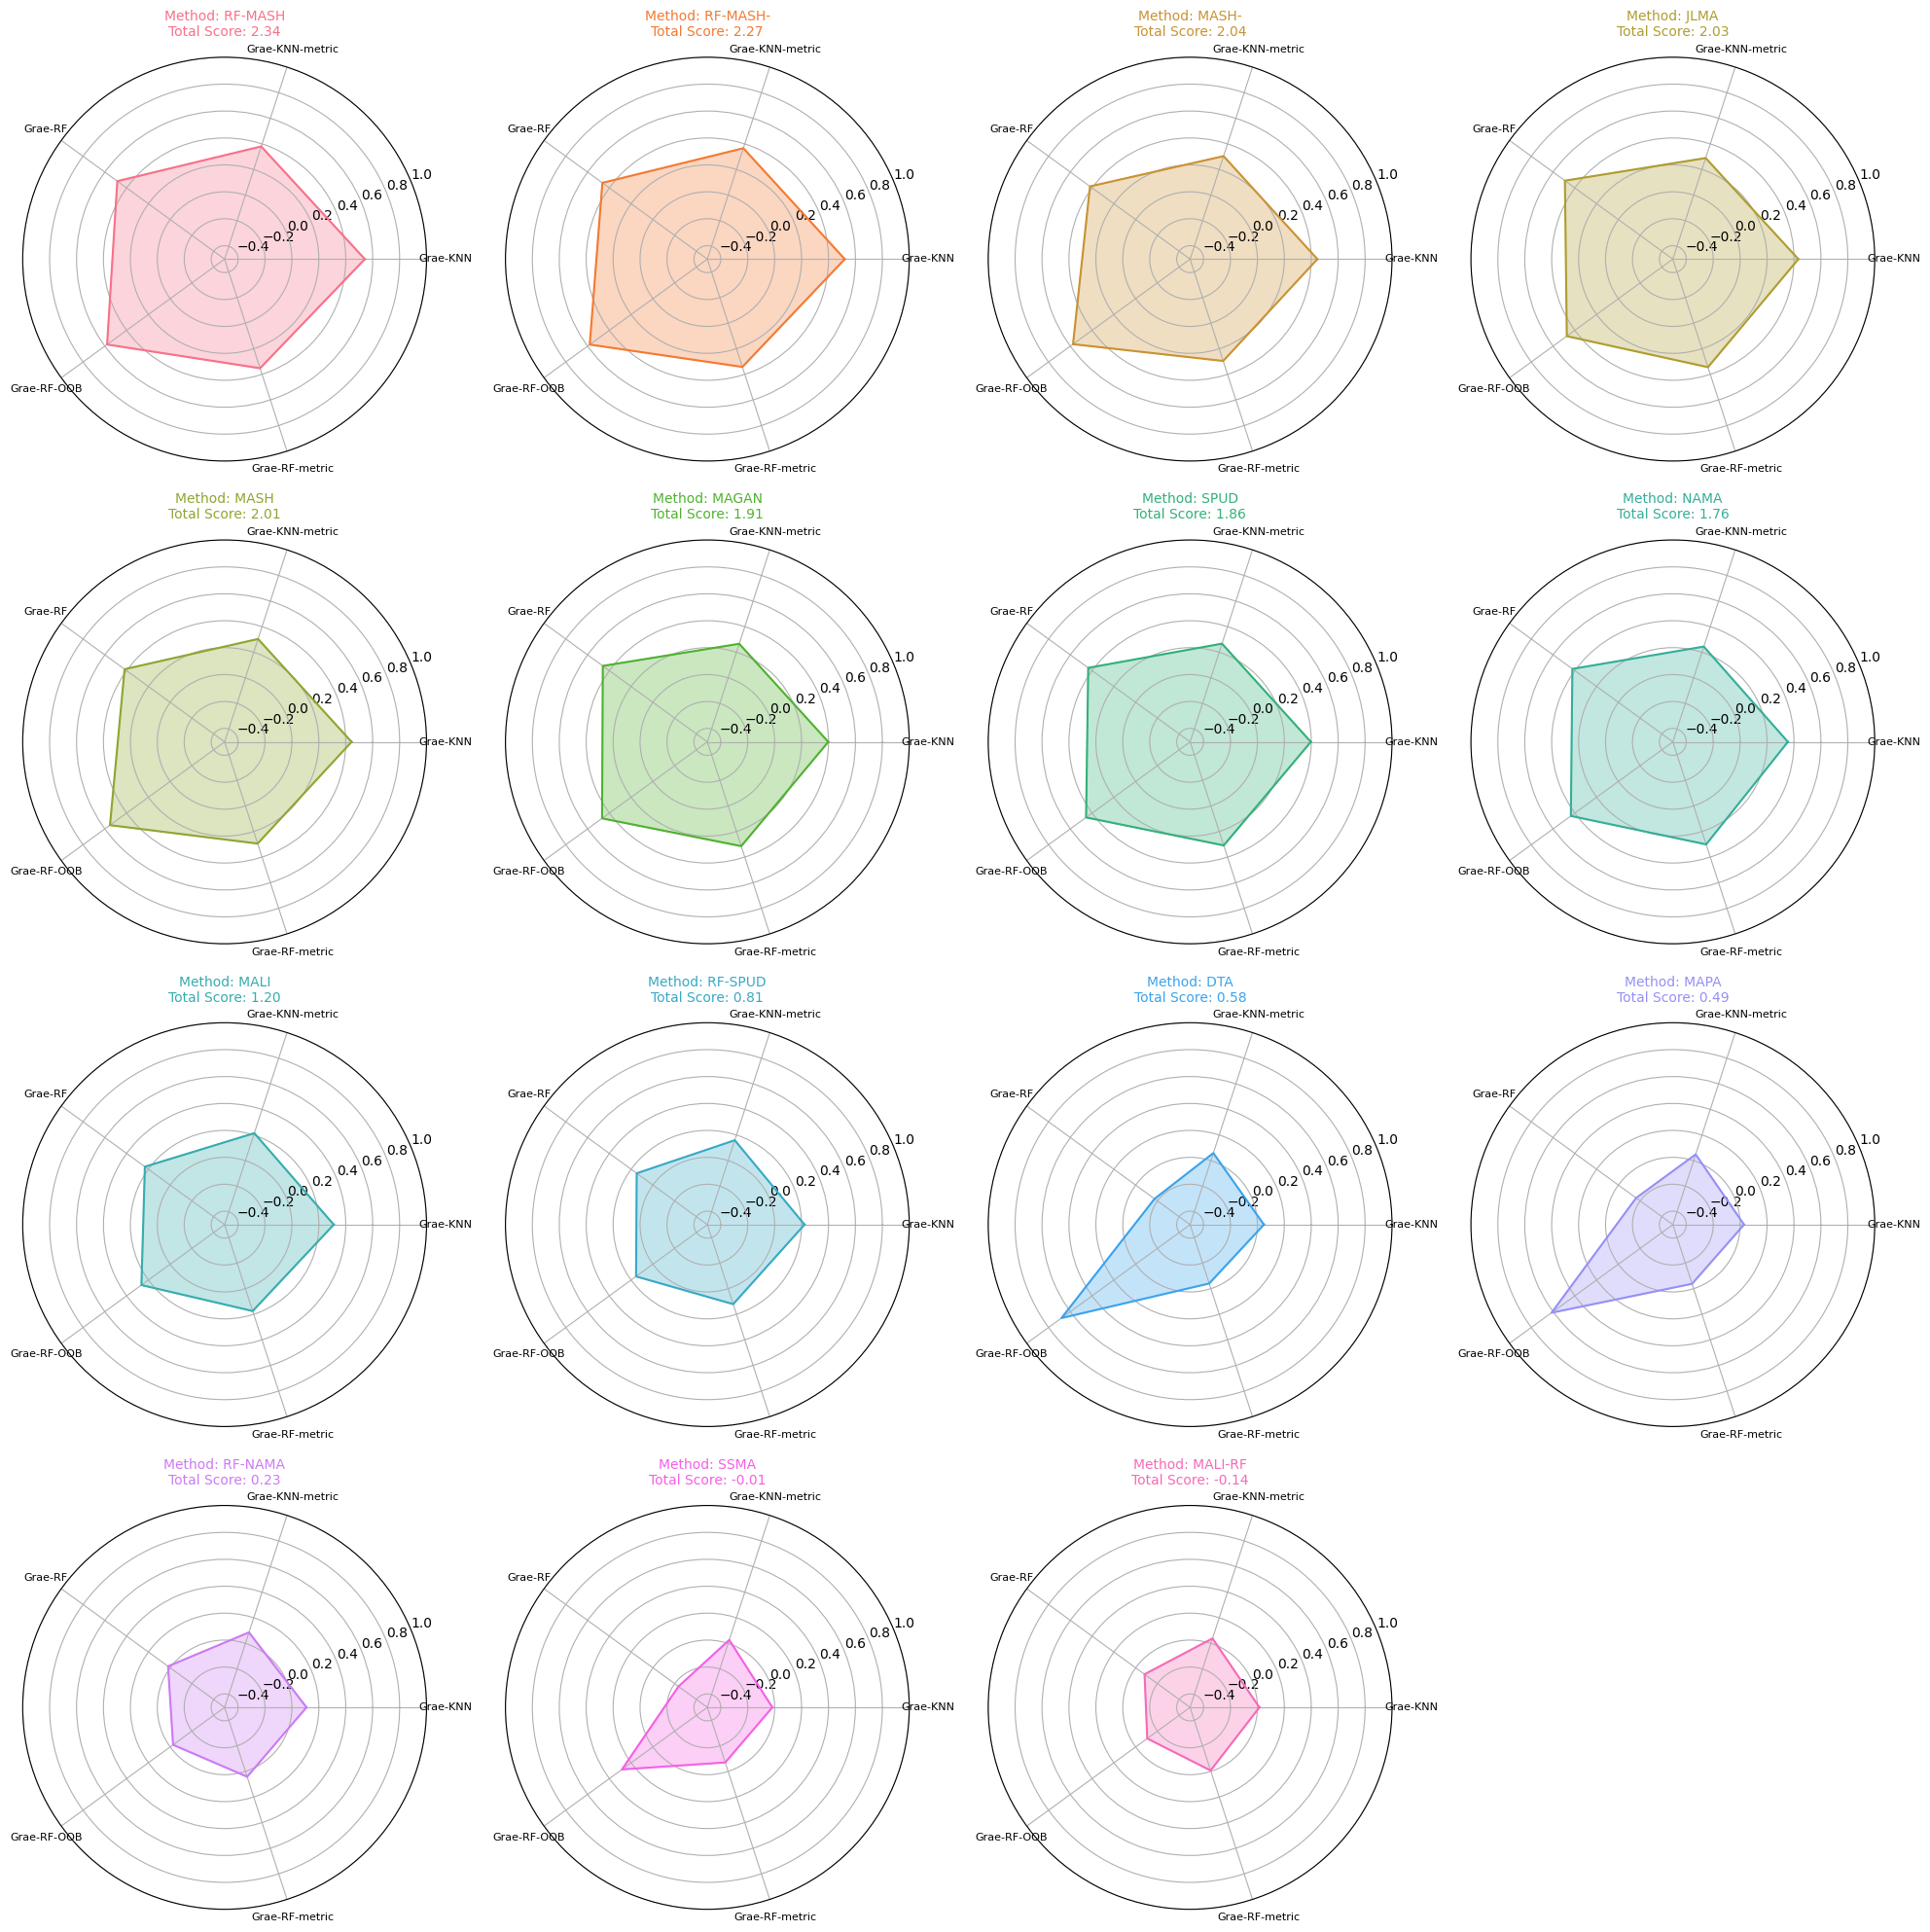

In [22]:
plot_radial(full_data, [#'CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor',
                          #'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)',
                          'Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'])

In [23]:
metrics_df = plt_methods_by_metric(df = full_data,
                    plot_methods=["MASH", "NAMA", "MALI", "SPUD", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"],
                    return_df=True)
metrics_df

,index,SSMA,MAGAN,DTA,SPUD,MASH,MASH-,RF-MASH-,NAMA,RF-NAMA,PCR,JLMA,MASH_RF,MALI_RF,MALI,SPUD_RF
0,FOSCTTM,0.251462,0.003965,0.158615,0.014085,0.053210,0.092614,0.175227,0.045877,0.000461,0.177010,0.233162,0.045568,0.158884,0.170847,0.014078
1,Grae-RF,-0.235278,0.460010,-0.173486,0.435538,0.418602,0.419307,0.463995,0.422478,0.019437,-0.162821,0.491310,0.485306,-0.081615,0.232252,0.148816
2,Grae-KNN,-0.016895,0.398445,0.048444,0.397236,0.443270,0.445739,0.521035,0.354679,0.108471,0.029179,0.432510,0.541937,0.014820,0.310919,0.221949
3,Nearest Neighbor,0.236446,0.383893,0.415754,0.361380,0.479640,0.467229,0.553119,0.325752,-0.017015,0.301906,0.423654,0.538207,-0.057266,0.233467,0.166647
4,Random Forest Emb,0.008861,0.471638,0.363444,0.421506,0.494973,0.507670,0.554774,0.383521,-0.126588,0.265833,0.437567,0.539326,-0.145124,0.161692,0.077079
5,Grae-RF-OOB,0.284475,0.466873,0.681460,0.455198,0.552684,0.575161,0.580055,0.436465,-0.026745,0.614079,0.473705,0.579289,-0.106606,0.263916,0.154561
6,Random Forest OOB,0.250713,0.452572,0.504363,0.424597,0.556947,0.577273,0.620267,0.380997,-0.035636,0.380295,0.457888,0.595135,-0.132888,0.190649,0.188161
7,CE,0.296391,-0.118300,0.526154,0.066873,0.557460,0.572489,0.571338,-0.098088,-0.154732,0.426809,0.186421,0.546174,-0.220123,0.178812,-0.026099
8,Random Forest (F1 score or RMSE),0.934083,0.677896,0.727622,0.698604,0.641233,0.641135,0.599447,0.721855,1.014161,0.789241,0.683981,0.594929,1.031648,0.869305,0.900707
9,Nearest Neighbor (F1 score or RMSE),0.832499,0.743620,0.728815,0.751043,0.667203,0.677140,0.615579,0.771800,0.970468,0.796659,0.715125,0.609468,0.994242,0.832154,0.866981


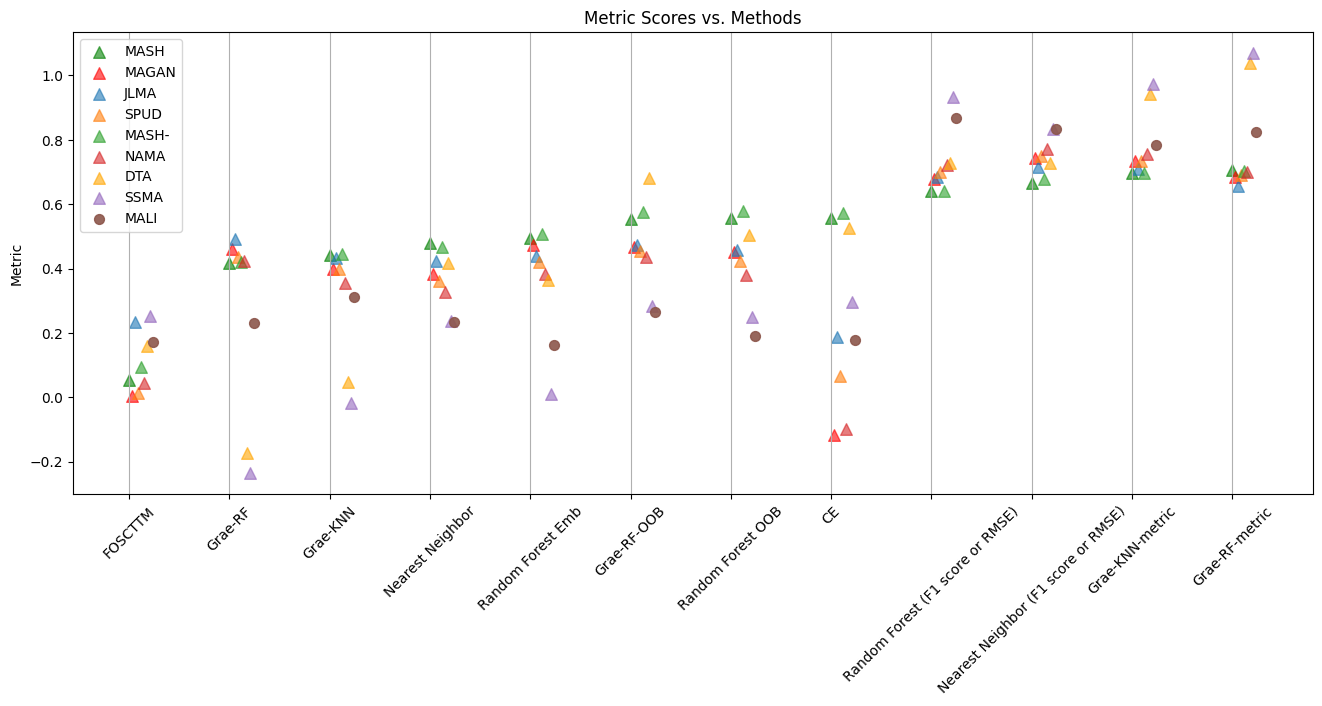

In [24]:
plt_methods_by_metric(df = full_data,
                    plot_methods=["MASH", "NAMA", "MALI", "SPUD", "SSMA", "MASH-", "BL_A-B", "BL_B-A", "MAGAN", "JLMA", "DTA"])

# Compare Grae to RF Extend

In [25]:
full_data.sample(2)

,method,csv_file,split,Percent_of_Anchors,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,A_Classification_Score,B_Classification_Score,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
457,RF-NAMA,OpticalNetwork,random,0.3,-0.224592,0.001682,-0.081018,-0.133417,-0.004044,0.981077,1.042296,-0.226274,-0.020758,0.542128,0.050620,0.982944,-0.115261,-0.087580,1.066297
777,MAPA,Automobile,turn,0.3,0.889903,0.008856,0.637619,0.208358,0.306230,0.861743,0.889137,0.881048,0.612513,0.612513,0.057182,0.696845,-0.290101,0.957158,0.814929


In [26]:
group_df = full_data.drop(columns = ["csv_file", "split", "Percent_of_Anchors", "A_Classification_Score", "B_Classification_Score"]).groupby(by = "method").mean()
group_df#.plot( )

,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),Combined_Metric,Grae-KNN,Grae-KNN-metric,Grae-RF,Grae-RF-OOB,Grae-RF-metric
method,,,,,,,,,,,,,
DTA,0.526154,0.158615,0.504363,0.363444,0.415754,0.728815,0.727622,0.367539,0.048444,0.941068,-0.173486,0.681460,1.040180
JLMA,0.186421,0.233162,0.457888,0.437567,0.423654,0.715125,0.683981,-0.046741,0.432510,0.710533,0.491310,0.473705,0.655668
MAGAN,-0.118300,0.003965,0.452572,0.471638,0.383893,0.743620,0.677896,-0.122265,0.398445,0.733898,0.460010,0.466873,0.685366
MALI,0.178812,0.170847,0.190649,0.161692,0.233467,0.832154,0.869305,0.007964,0.310919,0.785421,0.232252,0.263916,0.824874
MALI-RF,-0.220123,0.158884,-0.132888,-0.145124,-0.057266,0.994242,1.031648,-0.379007,0.014820,0.961203,-0.081615,-0.106606,1.007045
MAPA,0.426809,0.177010,0.380295,0.265833,0.301906,0.796659,0.789241,0.249799,0.029179,0.951236,-0.162821,0.614079,1.037673
MASH,0.557460,0.053210,0.556947,0.494973,0.479640,0.667203,0.641233,0.504250,0.443270,0.696203,0.418602,0.552684,0.705554
MASH-,0.572489,0.092614,0.577273,0.507670,0.467229,0.677140,0.641135,0.479875,0.445739,0.695492,0.419307,0.575161,0.704380
NAMA,-0.098088,0.045877,0.380997,0.383521,0.325752,0.771800,0.721855,-0.143965,0.354679,0.755690,0.422478,0.436465,0.699235


In [27]:
group_df.columns, group_df.index

(Index(['CE', 'FOSCTTM', 'Random Forest OOB', 'Random Forest Emb',
        'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)',
        'Random Forest (F1 score or RMSE)', 'Combined_Metric', 'Grae-KNN',
        'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric'],
       dtype='object'),
 Index(['DTA', 'JLMA', 'MAGAN', 'MALI', 'MALI-RF', 'MAPA', 'MASH', 'MASH-',
        'NAMA', 'RF-MASH', 'RF-MASH-', 'RF-NAMA', 'RF-SPUD', 'SPUD', 'SSMA'],
       dtype='object', name='method'))

In [28]:
rf_extend = group_df[['Random Forest OOB', 'Random Forest Emb', 'Nearest Neighbor', 'Nearest Neighbor (F1 score or RMSE)', 'Random Forest (F1 score or RMSE)']]  
grae = group_df[['Grae-KNN', 'Grae-KNN-metric', 'Grae-RF', 'Grae-RF-OOB', 'Grae-RF-metric']]

In [29]:
dif_values = rf_extend.values - grae.values

diff_df = pd.DataFrame(dif_values, index = group_df.index, columns = rf_extend.columns)
diff_df["Nearest Neighbor (F1 score or RMSE)"] = diff_df["Nearest Neighbor (F1 score or RMSE)"] * -1
diff_df["Random Forest (F1 score or RMSE)"] = diff_df["Random Forest (F1 score or RMSE)"] * -1 #To ensure that they are consistent on same side.

diff_df

,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE)
method,,,,,
DTA,0.455920,-0.577624,0.589240,-0.047354,0.312557
JLMA,0.025378,-0.272966,-0.067656,-0.241420,-0.028313
MAGAN,0.054127,-0.262260,-0.076117,-0.276747,0.007470
MALI,-0.120270,-0.623730,0.001216,-0.568238,-0.044431
MALI-RF,-0.147707,-1.106327,0.024349,-1.100848,-0.024603
MAPA,0.351116,-0.685403,0.464726,-0.182580,0.248432
MASH,0.113677,-0.201230,0.061037,-0.114519,0.064321
MASH-,0.131534,-0.187822,0.047922,-0.101979,0.063244
NAMA,0.026318,-0.372168,-0.096726,-0.335334,-0.022620


<Axes: xlabel='method'>

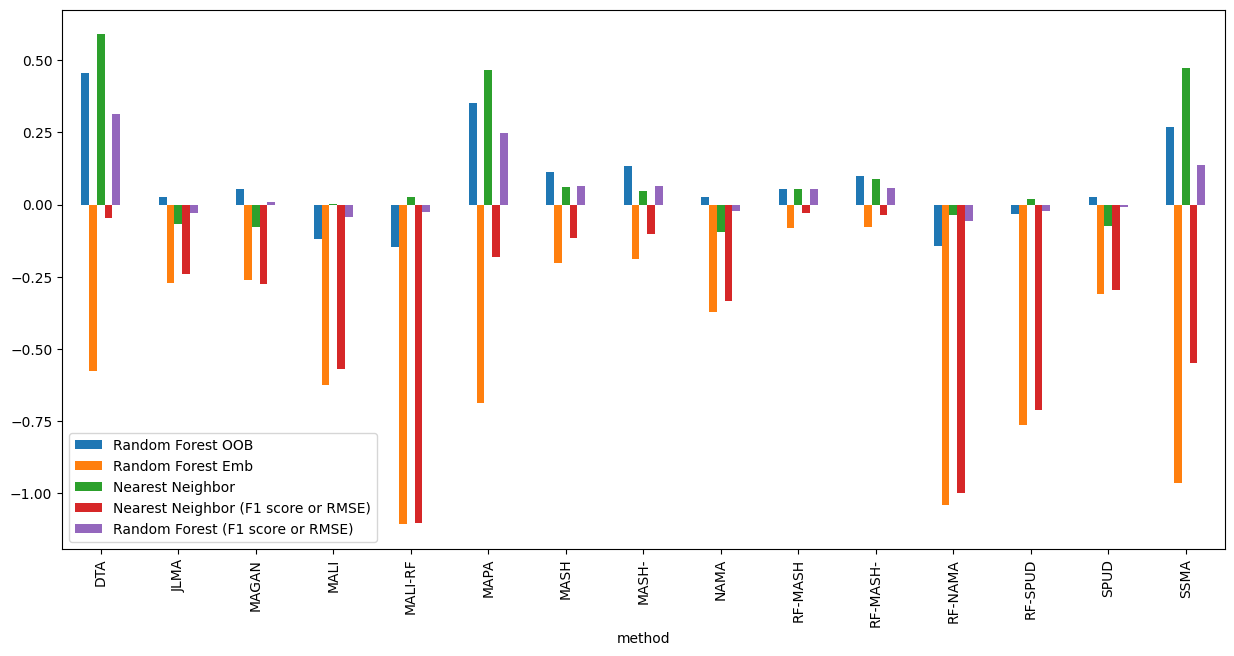

In [30]:
"""
Note that this below isn't really an assesment of how well each method did, but how different Grae is from the non-Grae
Also note that the RMSE is multiplied by -1 so that the bar is on the side where the method is more favorable for it
"""
diff_df.plot(kind = "bar", figsize=(15,7)) # Calculated Non-Grae verisons - Grae_versions

# Veiw Feature variance

In [31]:
reg_df = read_json_files_to_dataframe("/yunity/arusty/Graph-Manifold-Alignment/Results/RegressionData")

#Average out the random seeds
reg_df["CE"] = [np.mean(list(d.values())) for d in reg_df["CE"].values]
reg_df["FOSCTTM"] = [np.mean(list(d.values())) for d in reg_df["FOSCTTM"].values]
reg_df["Combined_Metric"] = reg_df["CE"] - reg_df["FOSCTTM"]
reg_df.sample(2)

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD,Combined_Metric
867,MALI-RF,IstanbulStock,distort,0.3,"{'knn': 2, 'mu': 0.99, 't': 'DPT-I', 'transiti...",-0.193093,0.177107,"{'42': -0.020987607671614672, '1738': -0.07746...","{'42': -0.12183305520124121, '1738': -0.016046...","{'42': -0.07186301799588479, '1738': 0.0104204...","{'42': 1.1581923559053304, '1738': 1.106738458...","{'42': 1.184882177489538, '1738': 1.1214408518...","{'42': {'RF-OOB': -0.12169020193648916, 'KNN':...",{},-0.370200
1030,NAMA,ConcreteSlumpTest,distort,0.3,"{'OD_method': 'absolute_distance', 'agg_method...",-0.150657,0.000000,"{'42': 0.41831303446585577, '1738': 0.43036676...","{'42': 0.6736859781153681, '1738': 0.706144917...","{'42': 0.6157079121080218, '1738': 0.619084277...","{'42': 0.5625692046623887, '1738': 0.538338470...","{'42': 0.5183977423778284, '1738': 0.472832772...","{'42': {'RF-OOB': 0.3853969195021143, 'KNN': 0...","{'OD_method': 0.09279520367398164, 'agg_method...",-0.150657


### Spud Parameters on STD

In [32]:
spud_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "SPUD"]["Parameter STD"].values))
spud_param_df

,knn,OD_method,agg_method
0,0.293544,0.106728,0.328006
1,0.315521,0.136929,0.113630
2,0.299420,0.038904,0.179496
3,0.257186,0.017215,0.020762
4,0.251965,0.055214,0.303049
...,...,...,...
205,0.303843,0.137920,0.086527
206,0.245030,0.052678,0.133933
207,0.589315,0.178530,0.034385
208,0.222530,0.223938,0.006242


<Axes: >

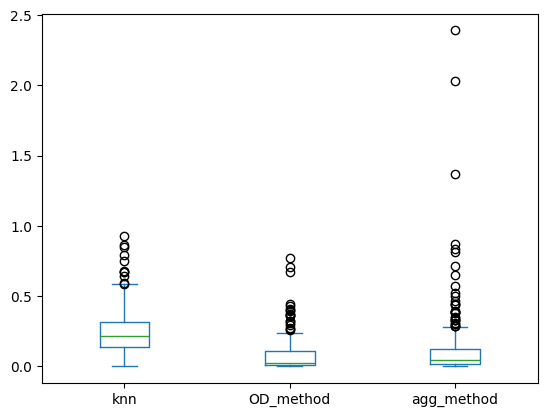

In [33]:
spud_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

## MASH Parameters on STD

In [34]:
mash_minus_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH-"]["Parameter STD"].values))
mash_minus_param_df

,knn,page_rank,DTM,density_normalization
0,0.091198,0.001743,0.056166,0.0
1,0.047936,0.000929,0.009001,0.0
2,0.069745,0.016468,0.034861,0.0
3,0.092476,0.003621,0.057043,0.0
4,0.051415,0.001241,0.002022,0.0
5,0.141600,0.008092,0.227942,0.0
6,0.191730,0.005466,0.008325,0.0
7,0.096132,0.125204,0.018123,0.0
8,0.165853,0.004503,0.059039,0.0
9,0.238521,0.004086,0.118961,0.0


<Axes: >

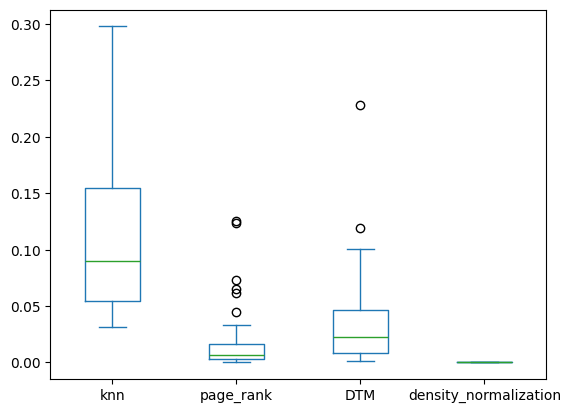

In [35]:
mash_minus_param_df.plot(kind = "box") #This is showing how the std fluctuates between datasets

In [36]:
mash_param_df = pd.DataFrame(list(reg_df[reg_df["method"] == "MASH"]["Parameter STD"].values))
mash_param_df

,connection_limit,threshold,epochs
0,0.000000,0.000000,0.000000e+00
1,0.000000,0.000000,0.000000e+00
2,0.000000,0.000000,0.000000e+00
3,0.000000,0.000000,0.000000e+00
4,0.034223,0.022946,1.110223e-16
5,0.000000,0.000000,0.000000e+00
6,0.006056,0.032130,0.000000e+00
7,0.000000,0.000000,0.000000e+00
8,0.000000,0.000000,0.000000e+00
9,0.000000,0.000000,1.110223e-16


<Axes: >

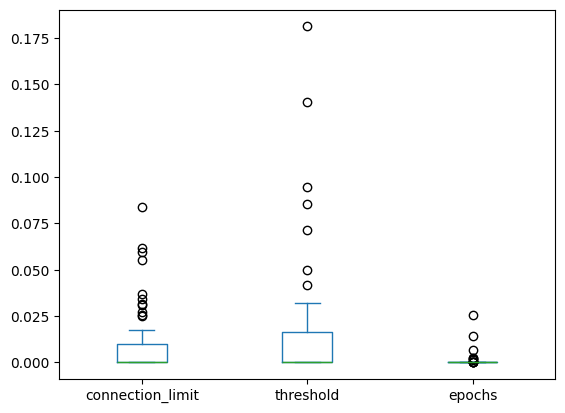

In [37]:
mash_param_df.plot(kind = "box") 